# Downloading random photos from the MNIST set
---

### Simple auxiliary script

***Author: Piotr Skalski***

## Imports

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
import matplotlib
import random
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download dataset

In [6]:
def download_mnist_dataset():
    # The MNIST data set is available at http://yann.lecun.com, let's use curl to download it
    if not os.path.exists("train-images-idx3-ubyte"):
        !curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
        !curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
        !curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
        !curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
        !gunzip t*-ubyte.gz
        
    # Let's use loadlocal_mnist available in mlxtend.data to get data in numpy array form.
    X1, y1 = loadlocal_mnist(
        images_path="train-images-idx3-ubyte", 
        labels_path="train-labels-idx1-ubyte")

    X2, y2 = loadlocal_mnist(
        images_path="t10k-images-idx3-ubyte", 
        labels_path="t10k-labels-idx1-ubyte")
    
    # We normalize the brightness values for pixels
    X1 = X1.reshape(X1.shape[0], -1) / 255
    X2 = X2.reshape(X2.shape[0], -1) /255

    # Combine downloaded data bundles
    X = np.concatenate([X1, X2])
    y = np.concatenate([y1, y2])
    
    return X, y

In [7]:
X, y = download_mnist_dataset()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  99815      0  0:01:39  0:01:39 --:--:--  332k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0  71135      0 --:--:-- --:--:-- --:--:-- 71135
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0   403k      0  0:00:03  0:00:03 --:--:--  403k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  17536      0 --:--:-- --:--:-- --:--:-- 17469


## Auxiliary function to display the selected data set element

In [49]:
def plot_digit(X, idx):
    img = X[idx, :].reshape(28,28)
    plt.style.use('dark_background')
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray',  interpolation='nearest')
    plt.axis('off')
    ax = plt.gca()
    ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
    plt.savefig(str(idx) + ".png", bbox_inches='tight', pad_inches = 0)

## Save random images

/home/skalskip/Documents/REPOS/ILearnDeepLearning.py/.env/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


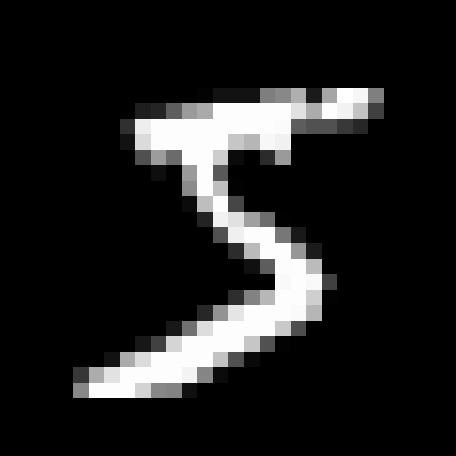

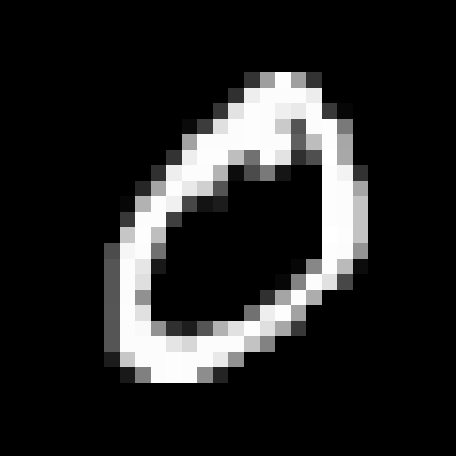

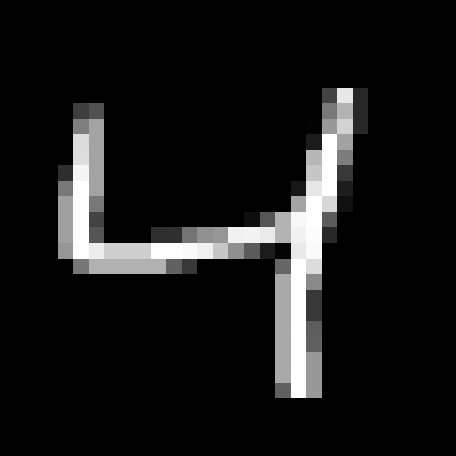

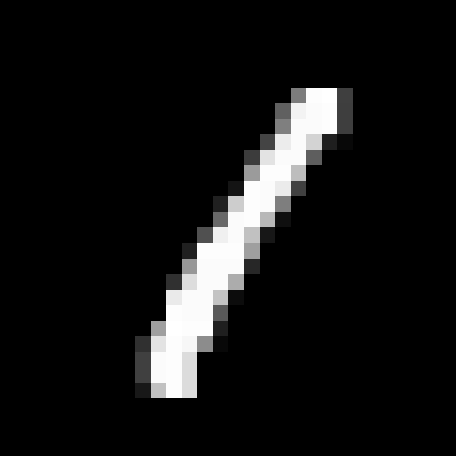

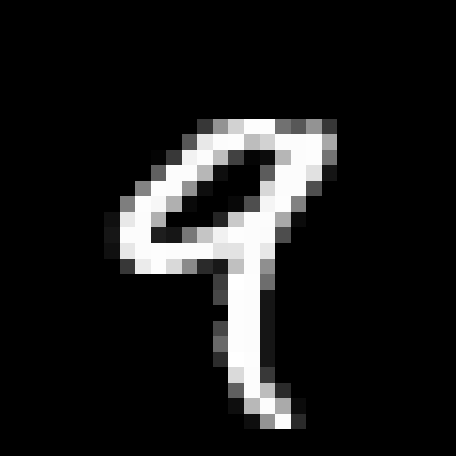

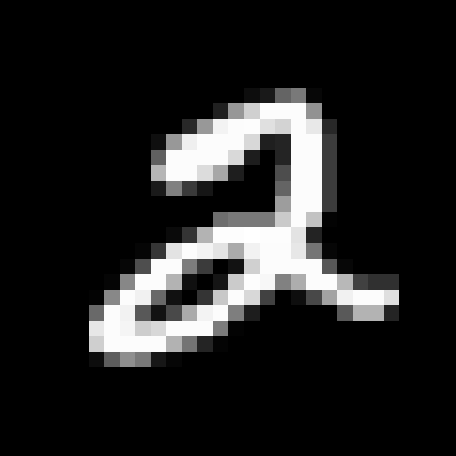

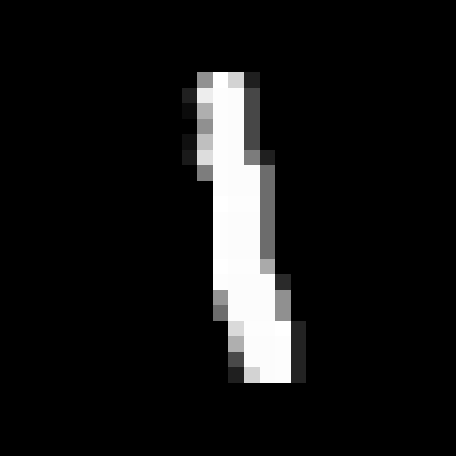

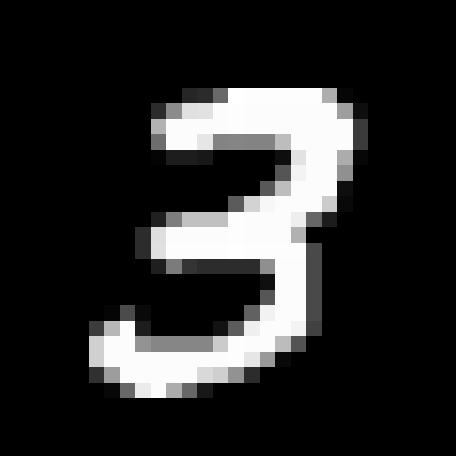

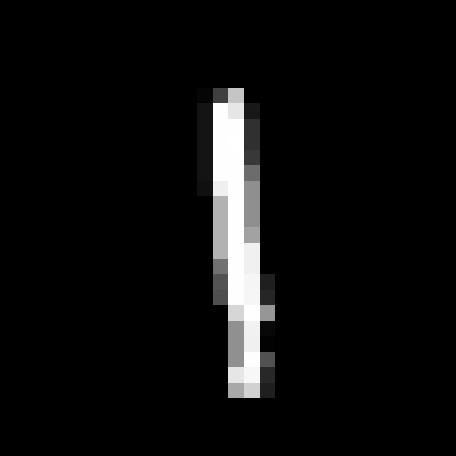

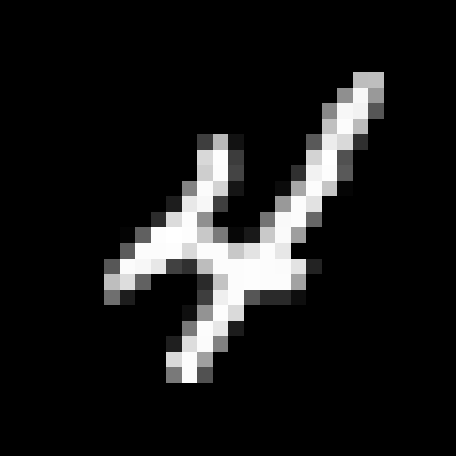

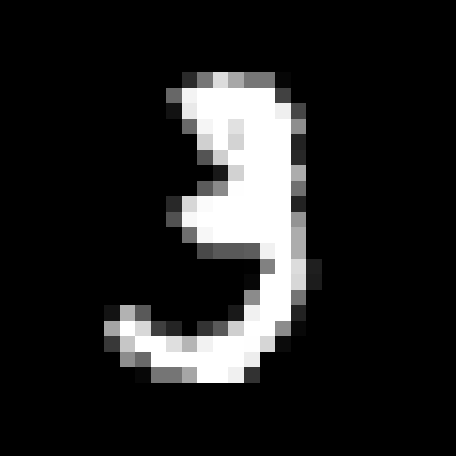

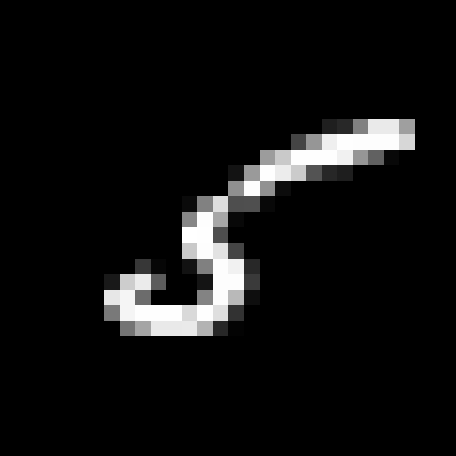

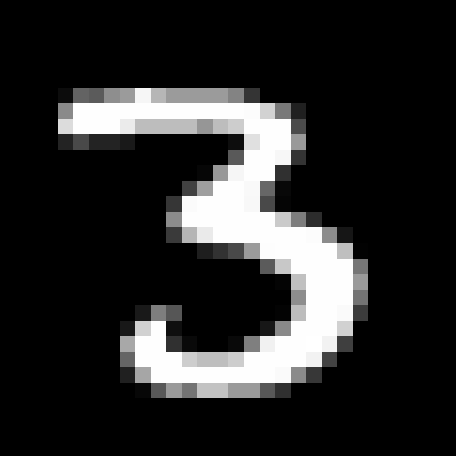

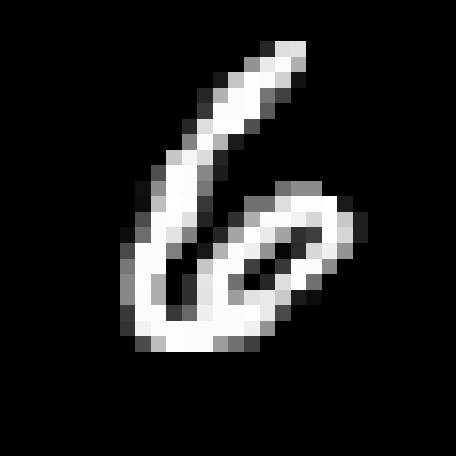

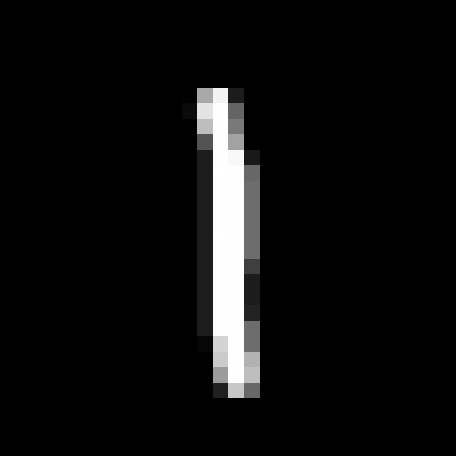

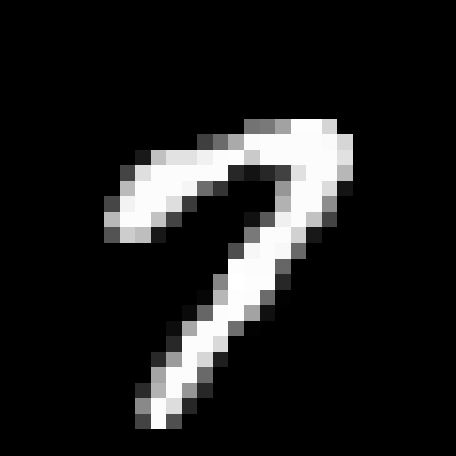

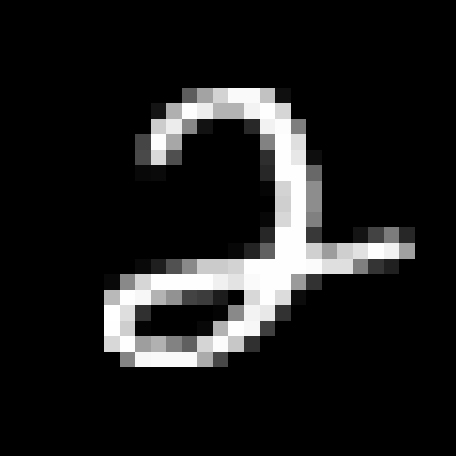

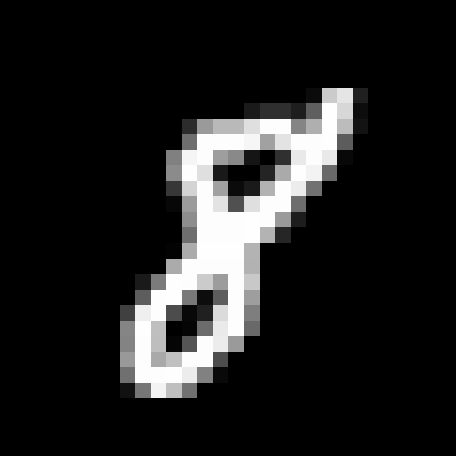

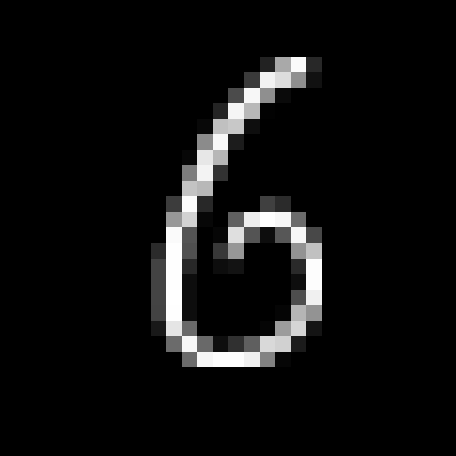

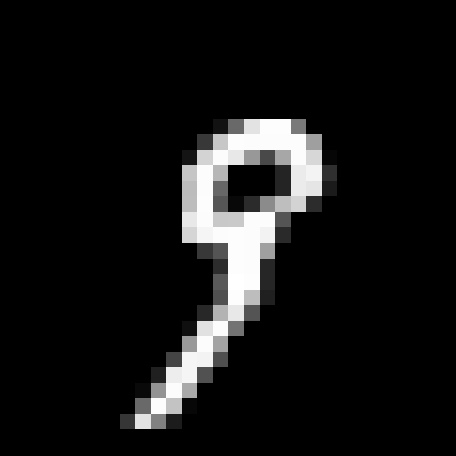

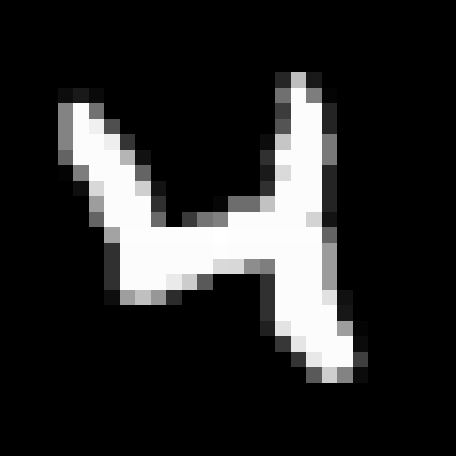

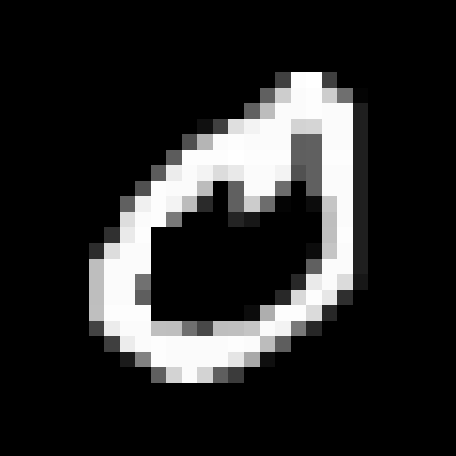

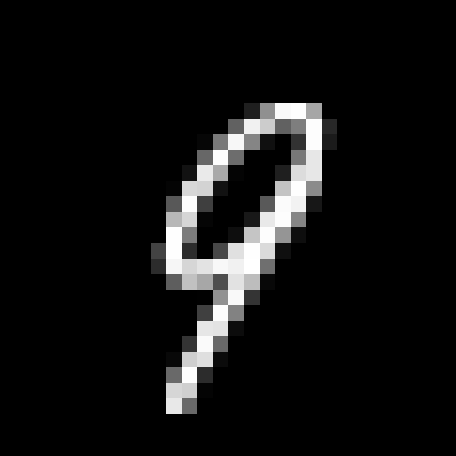

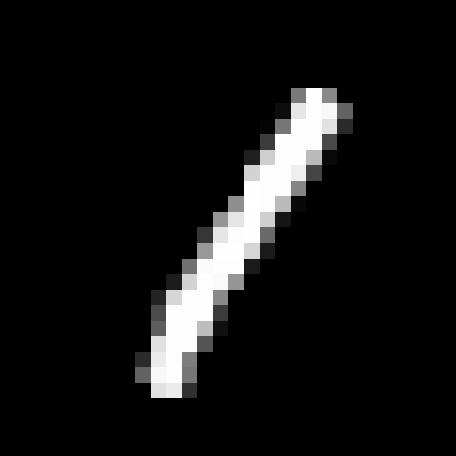

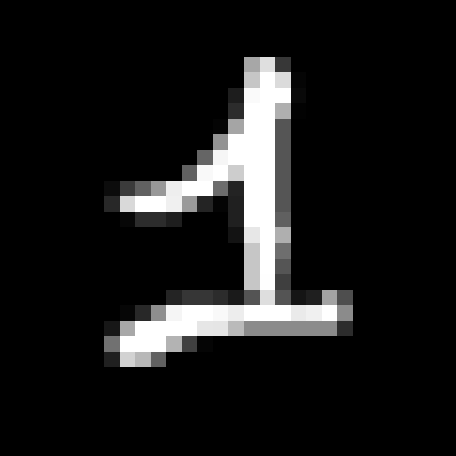

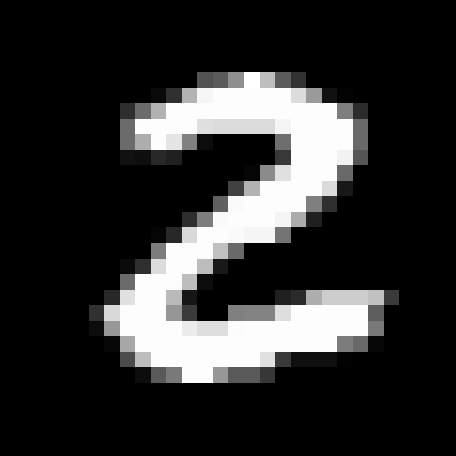

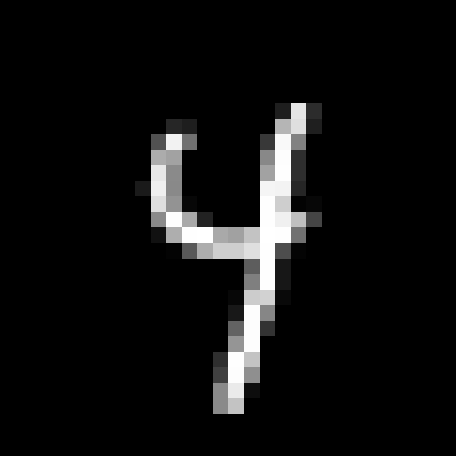

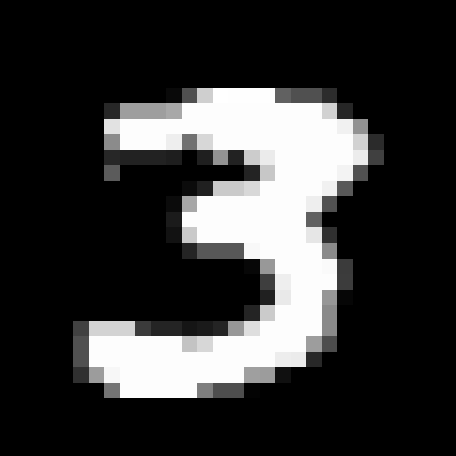

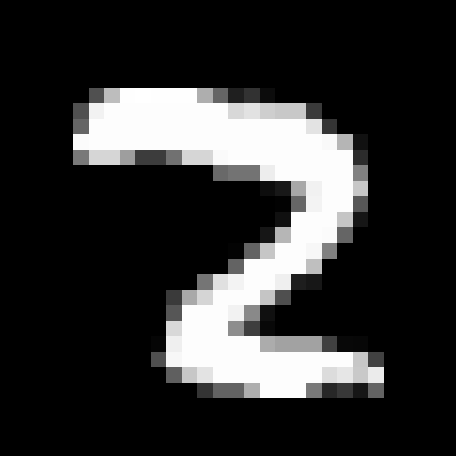

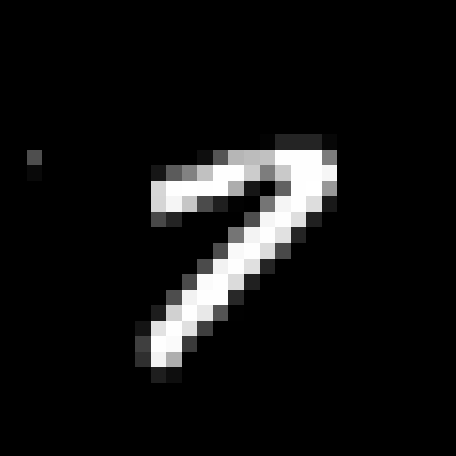

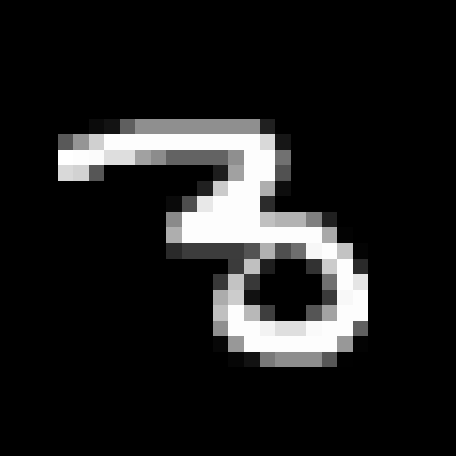

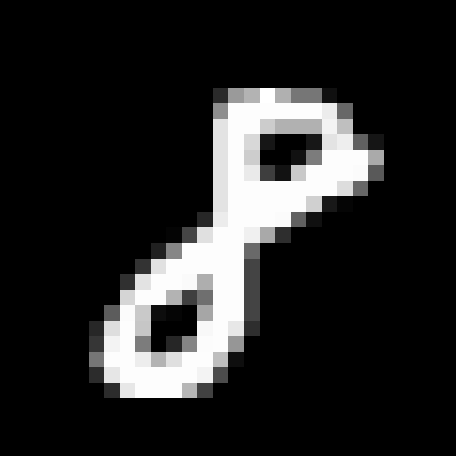

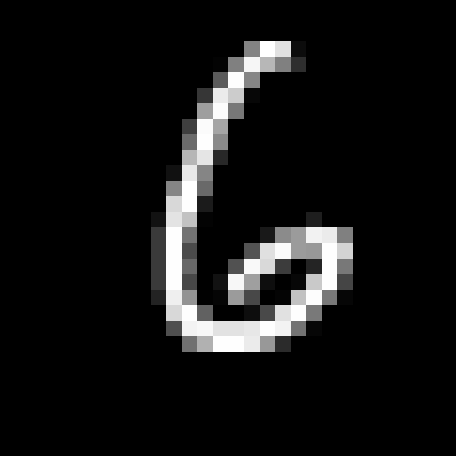

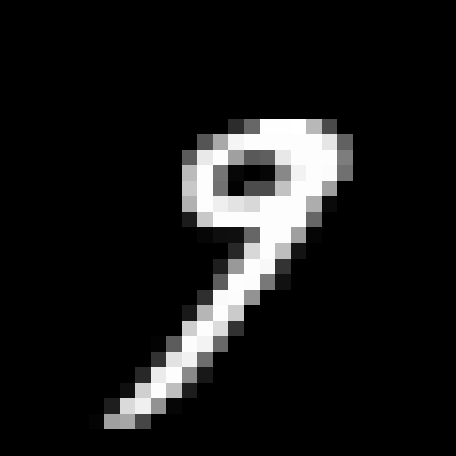

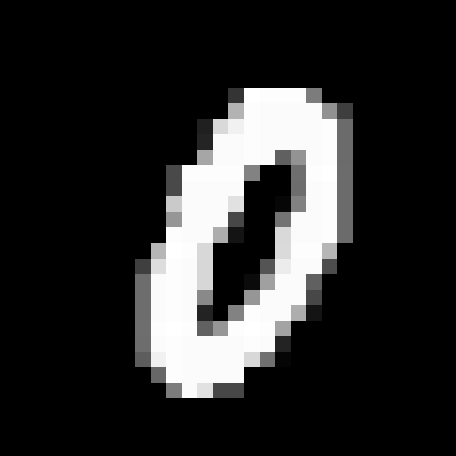

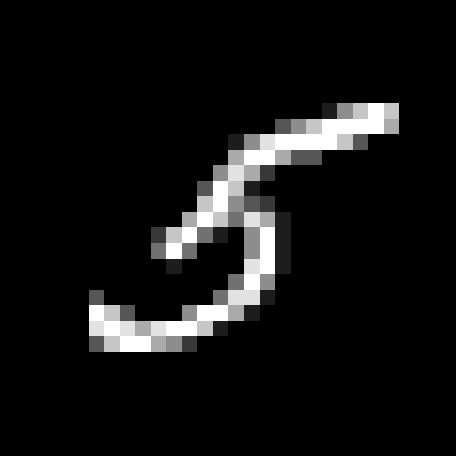

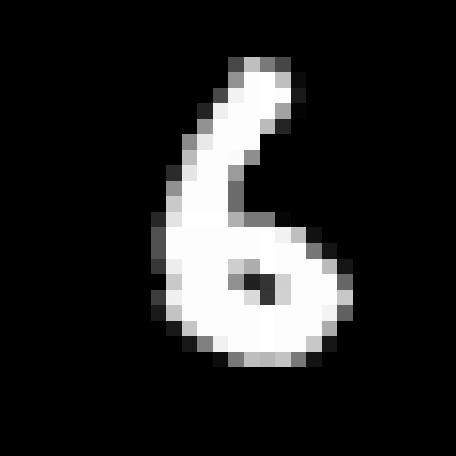

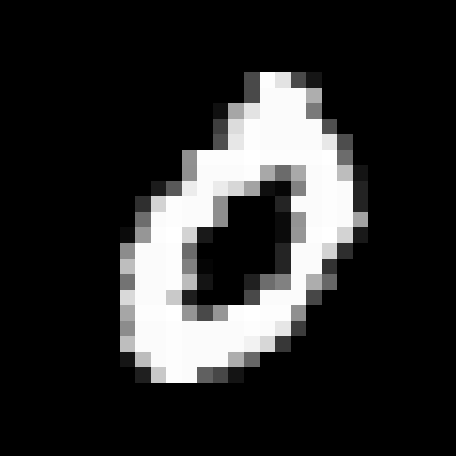

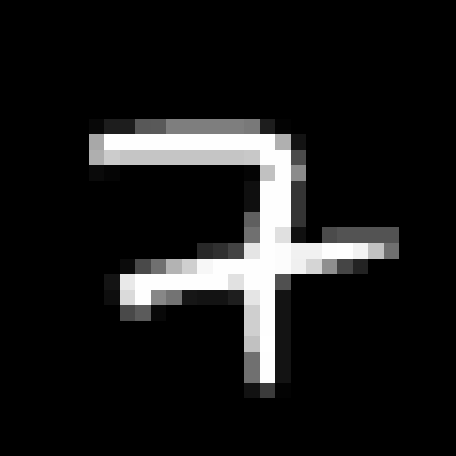

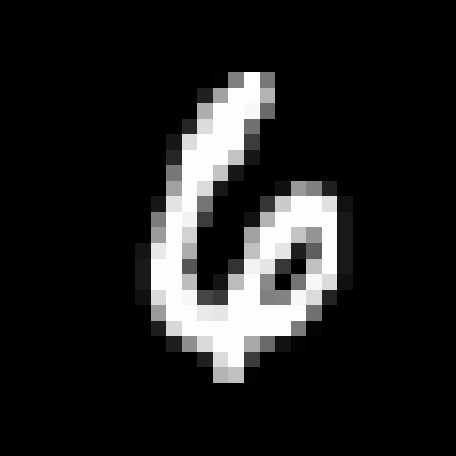

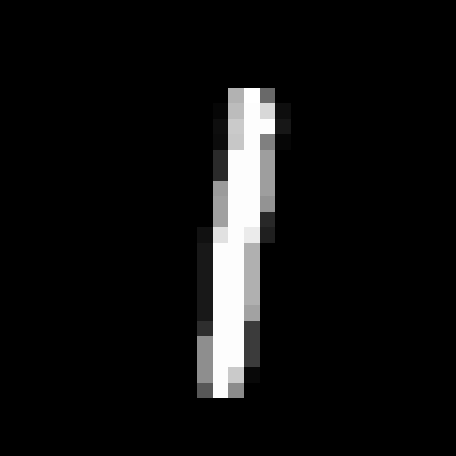

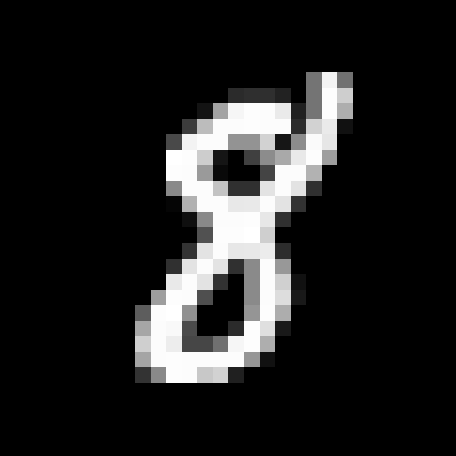

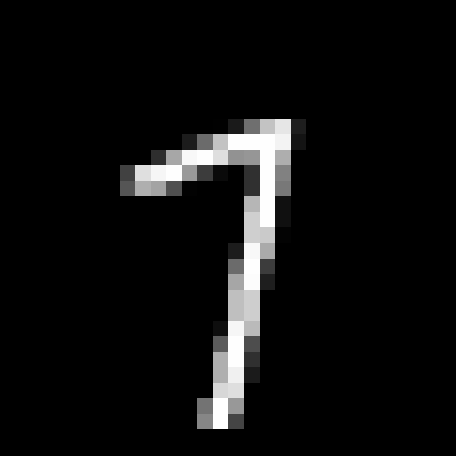

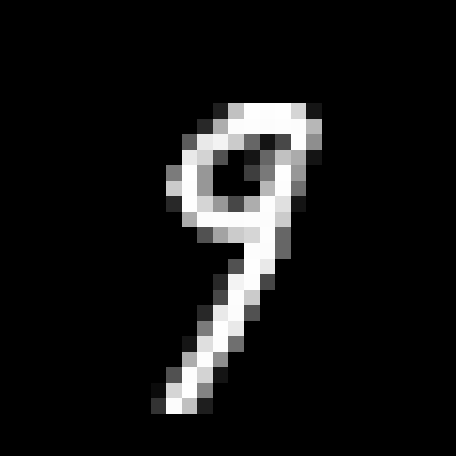

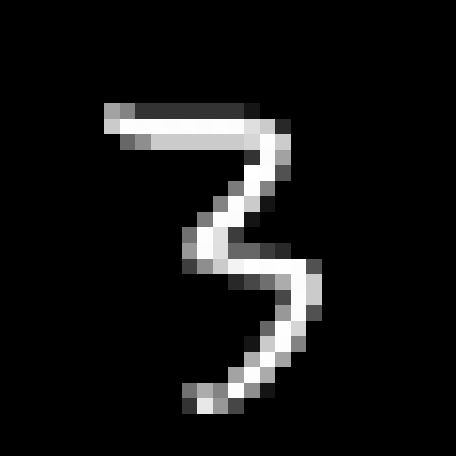

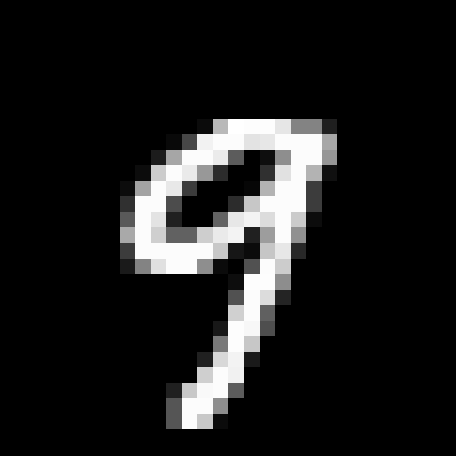

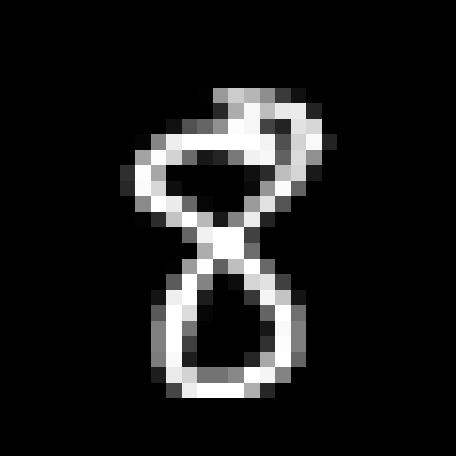

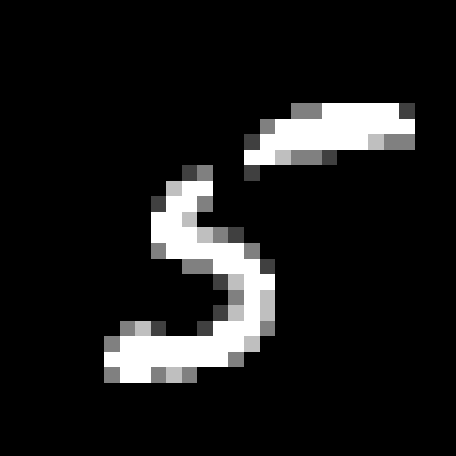

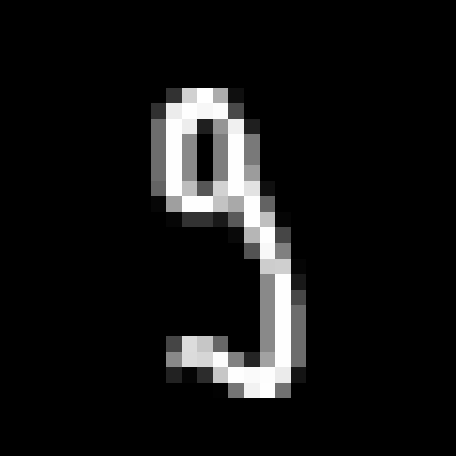

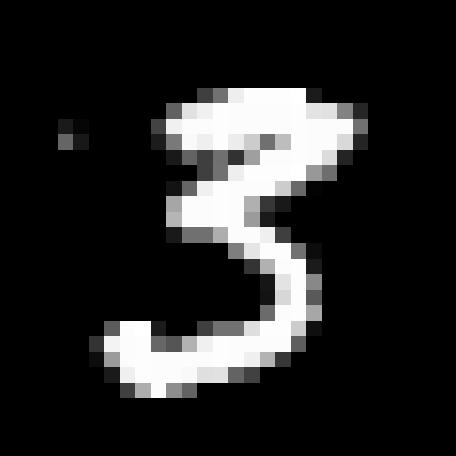

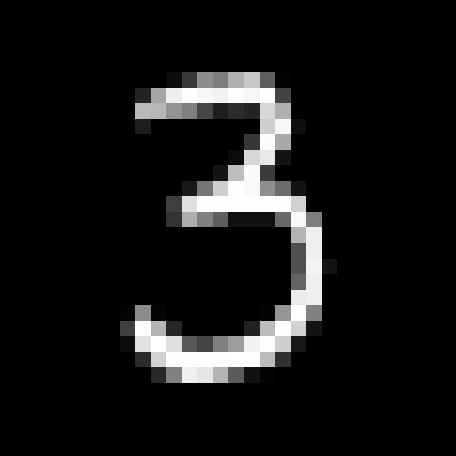

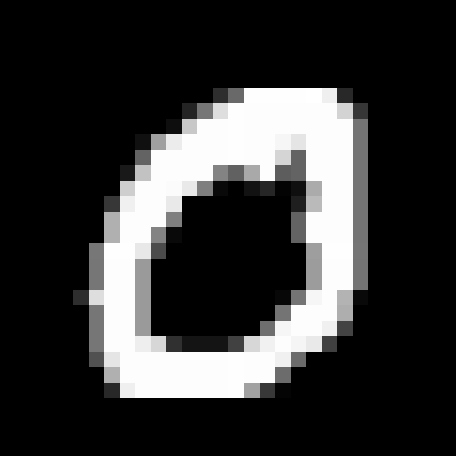

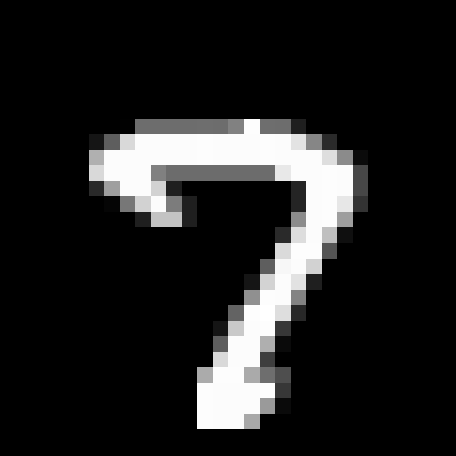

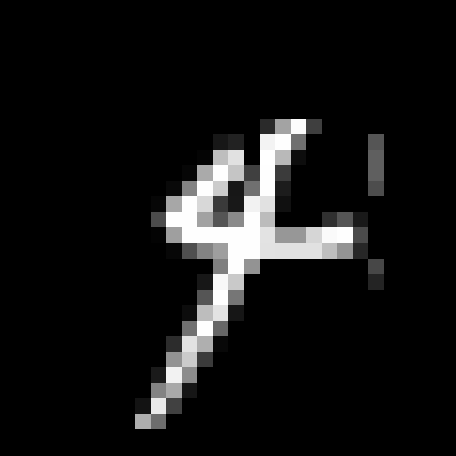

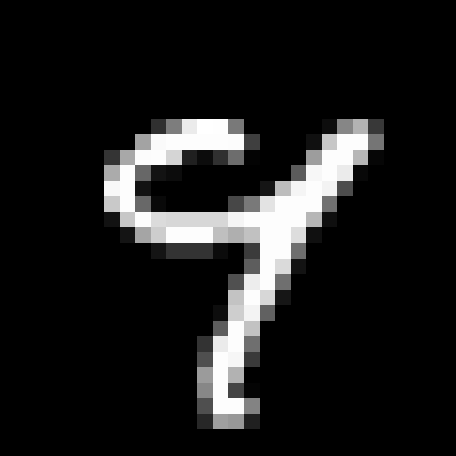

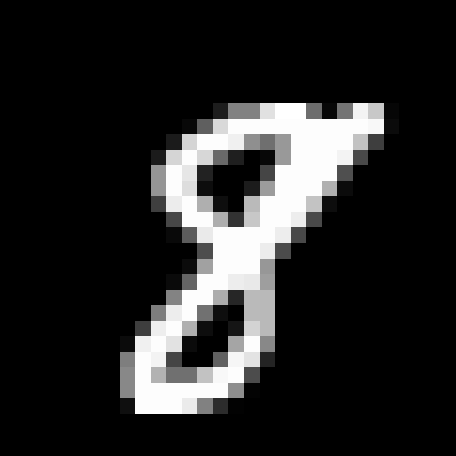

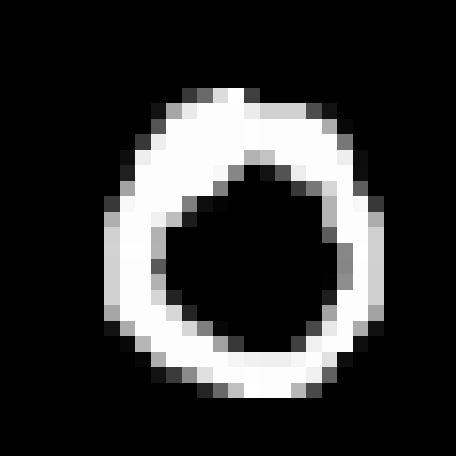

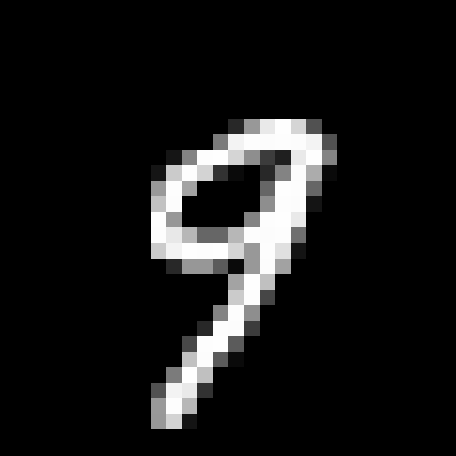

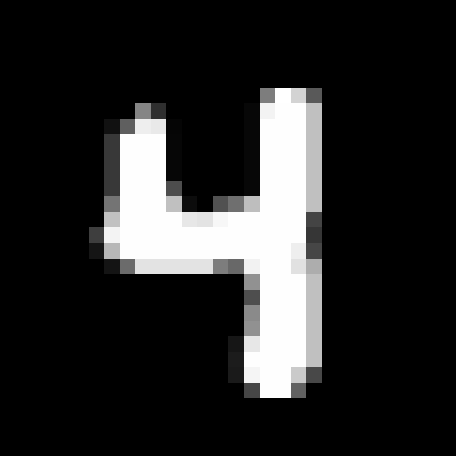

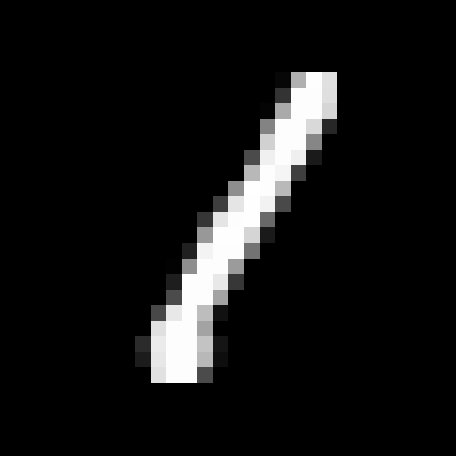

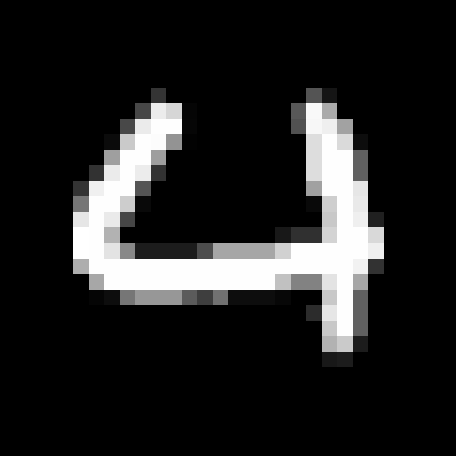

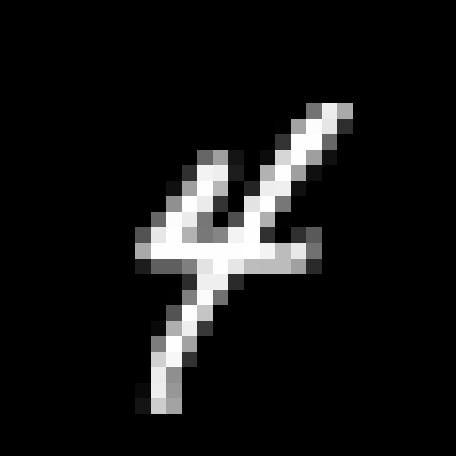

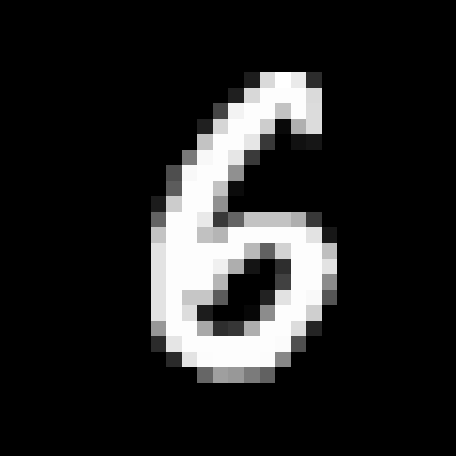

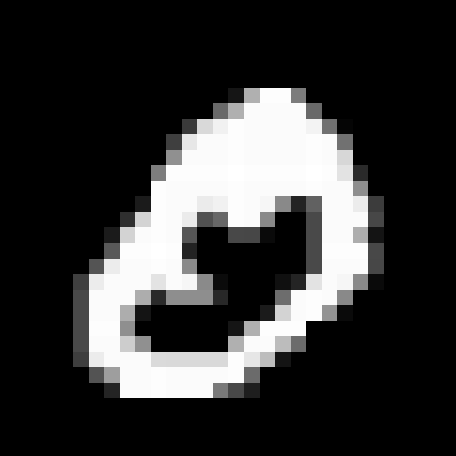

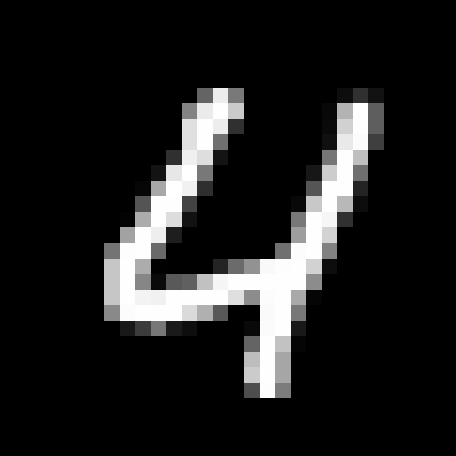

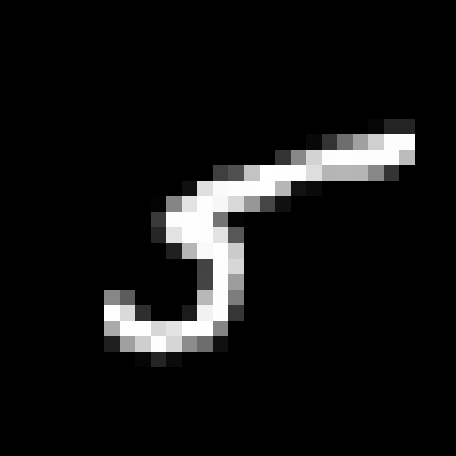

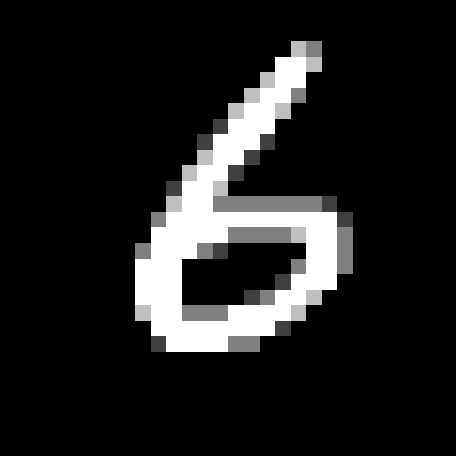

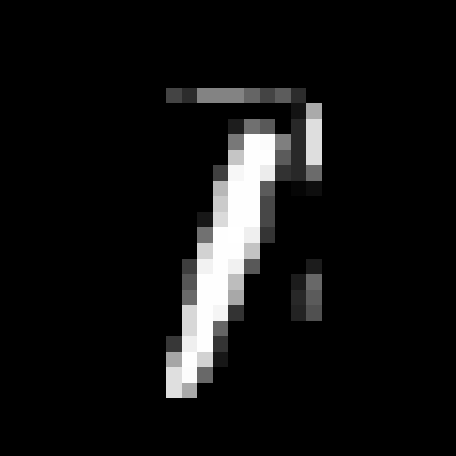

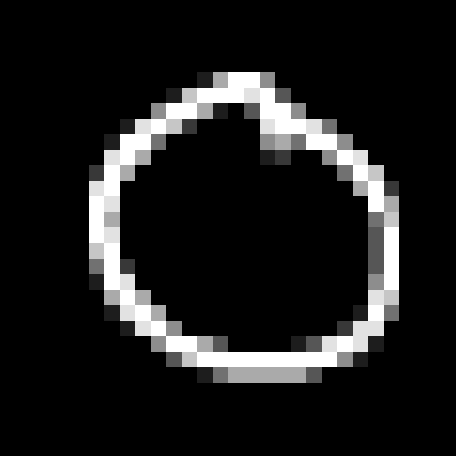

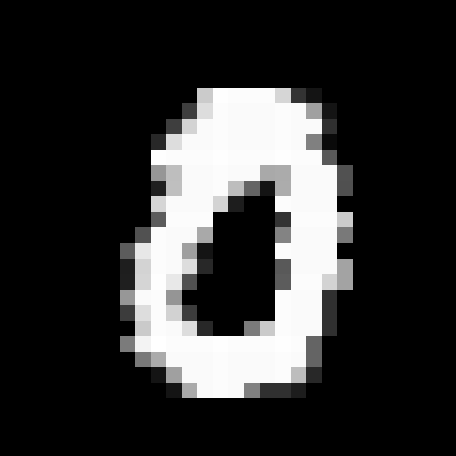

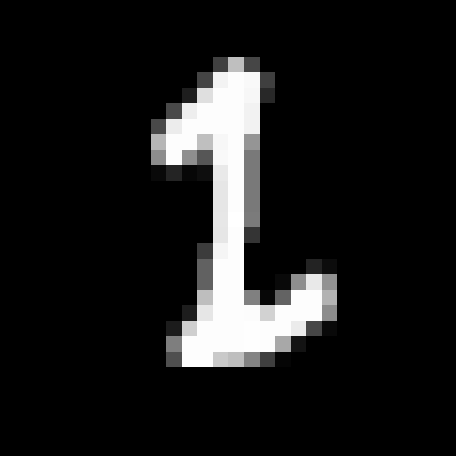

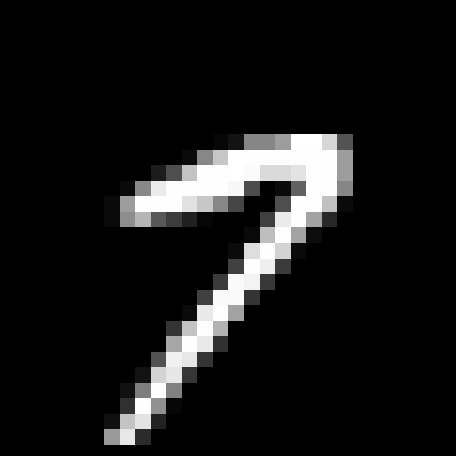

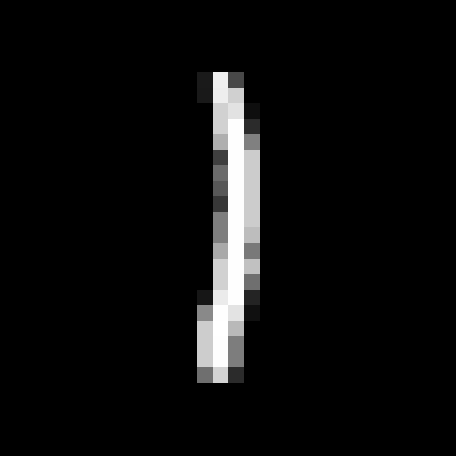

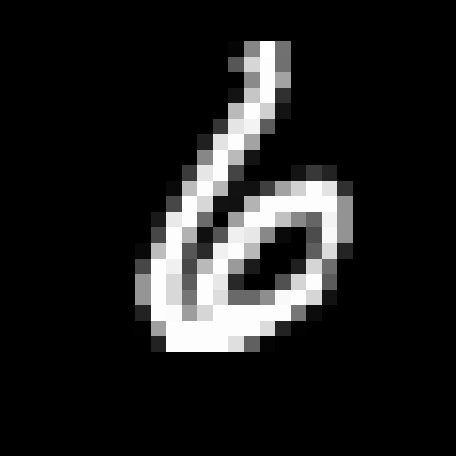

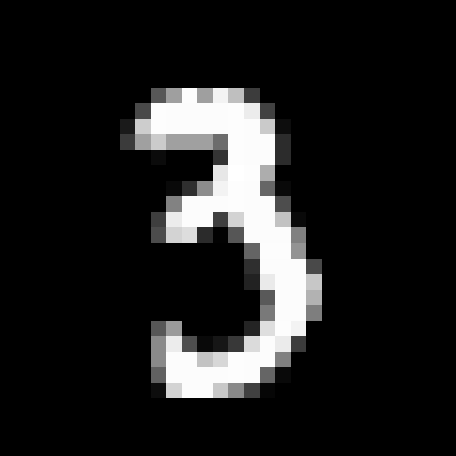

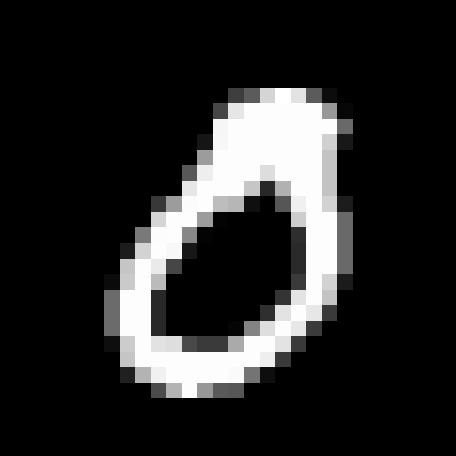

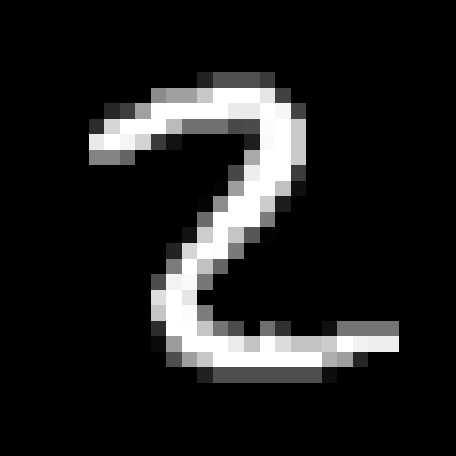

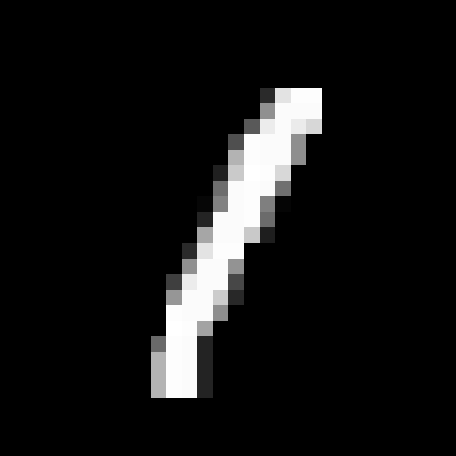

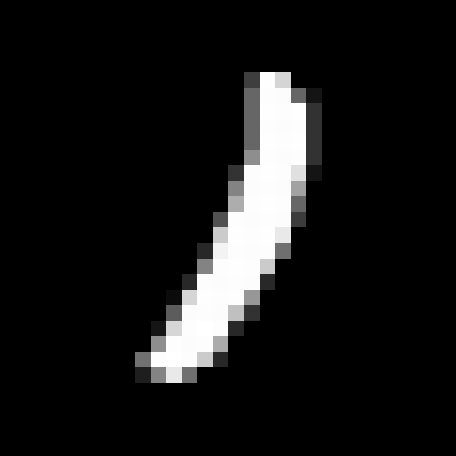

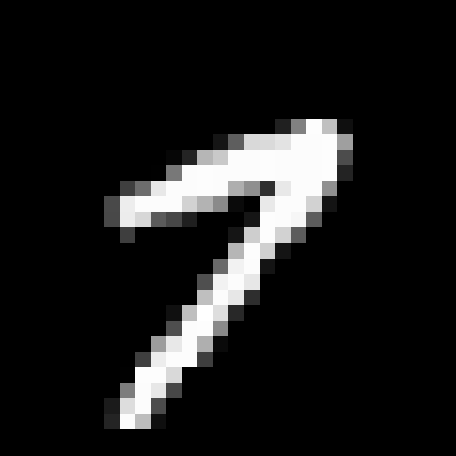

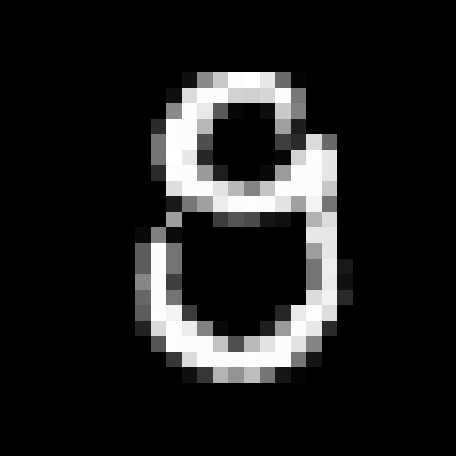

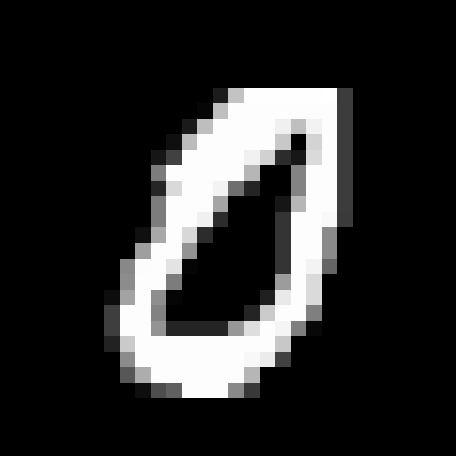

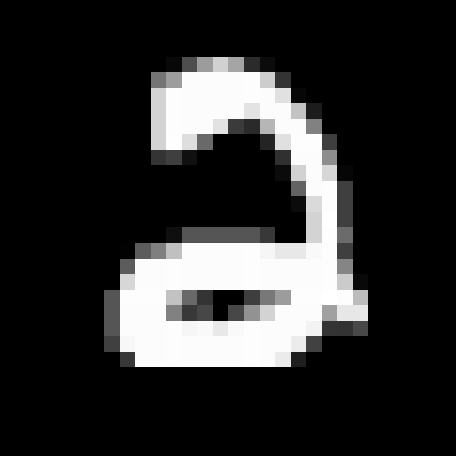

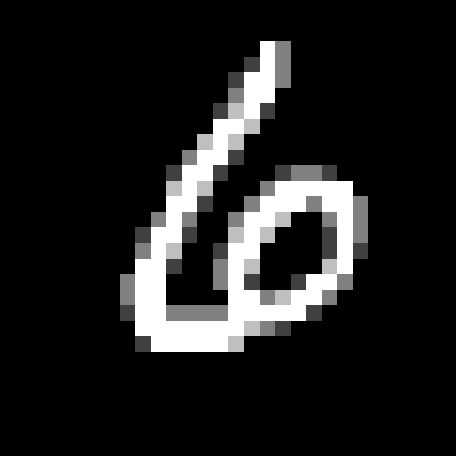

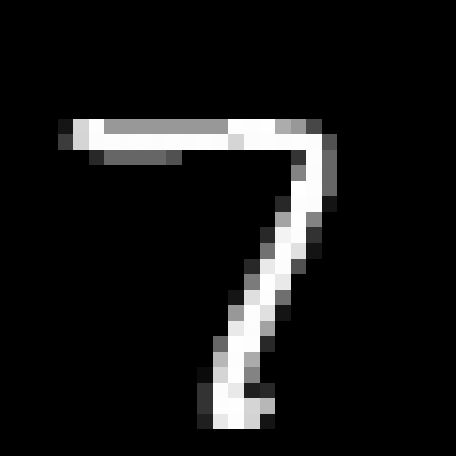

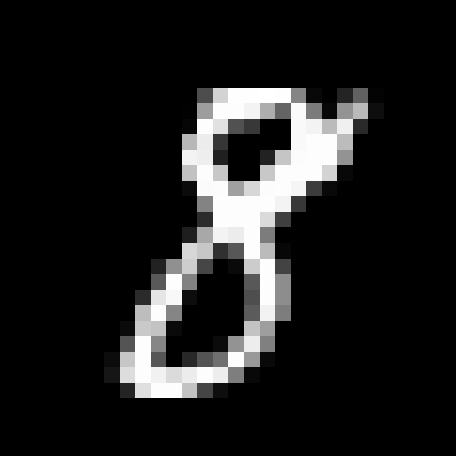

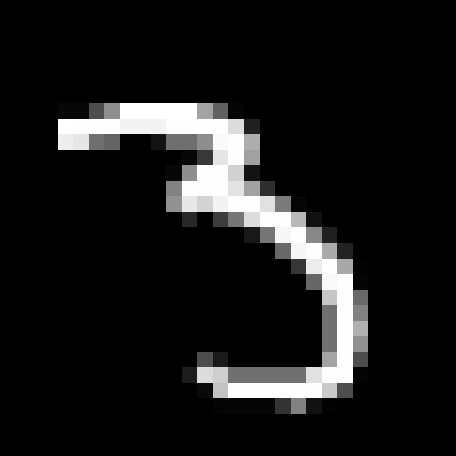

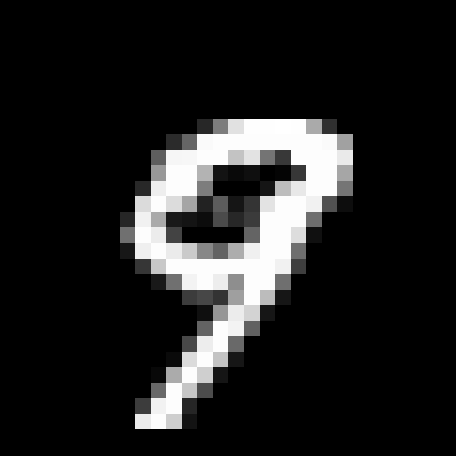

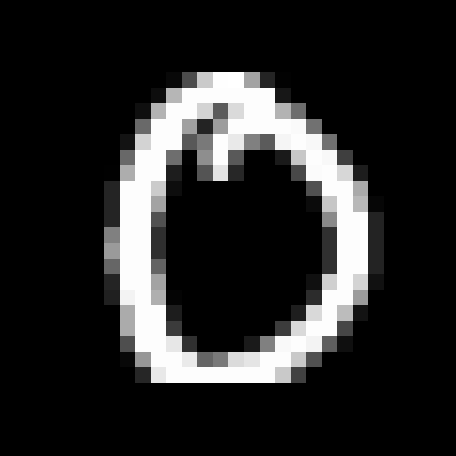

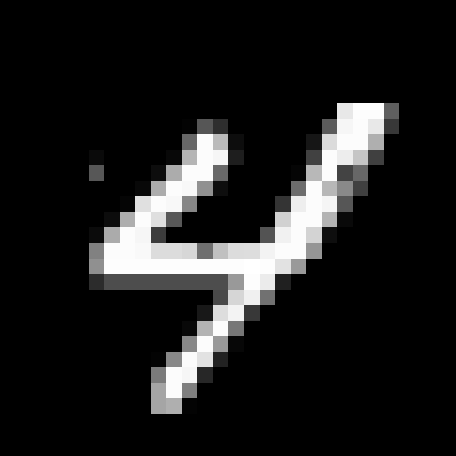

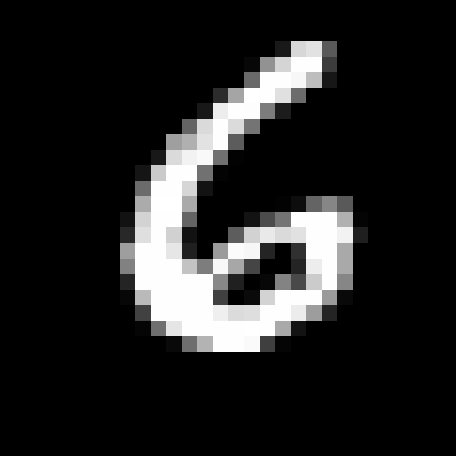

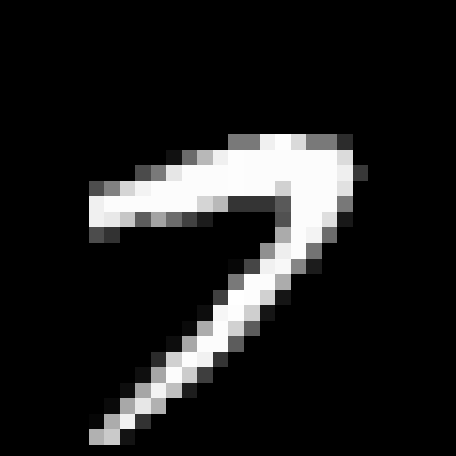

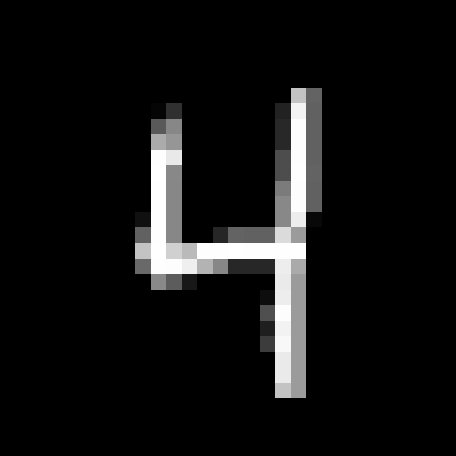

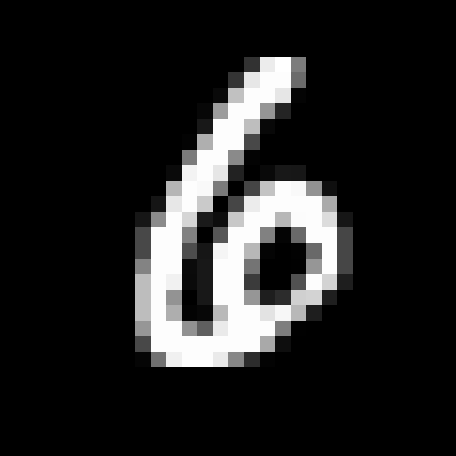

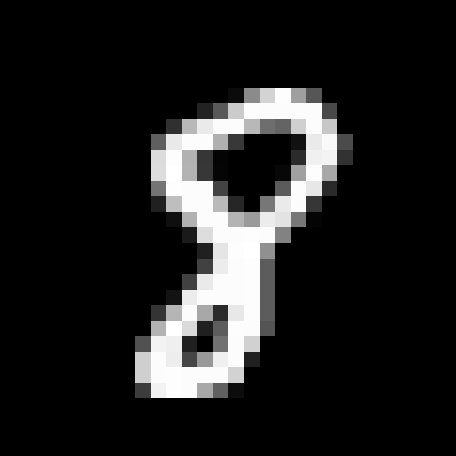

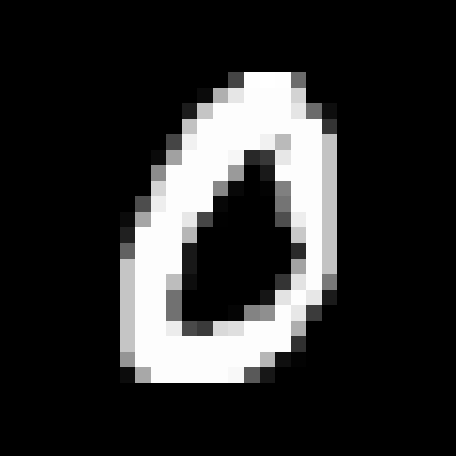

In [55]:
for i in range(96):
    plot_digit(X, i)